## Section 0: Introduction/Business Problem

### Brief Description:


1. Business Problem: An Italian Restaurant looking to expand into new geographical locations and Franchise.
2. Audience: Fine Dining Restaurant Owner or Market Researcher
3. Goal: To evaluate and explore New York, NY as a potential option to open a franchise location

## Section 1: Data Requirements

### Datasets

1. New York, NY - Restaurants in city along with details.
<br />
a. Rating
<br />
b. Quantity per square mile
<br />
c. Type of business
<br />
d. Location


1. A full report consisting of all of the following components (15 marks):
* Introduction where you discuss the business problem and who would be interested in this project.
* Data where you describe the data that will be used to solve the problem and the source of the data.
* Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
* Results section where you discuss the results.
* Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
* Conclusion section where you conclude the report.

## Section 2: Methodology

#### Pulling/setting up data
Using the foursquare api we are going to searh Itailian restaurants in Boston, MA. Setting radius to 100 miles. Adding features to the dataset such as rating and any other features foursquare api allows to evaluate/compare between restaurants in the area.

#### Explore the dataset:
1. Creating histogram by categories to get an idea of the varying types of italian food in the surrounding area.
<br /> 2. Plotting restaurants in the surrounding area to visualize the density of the area.

#### Exploratory data analysis
Adding target variables to the dataset. Adding rating feature to the base dataset.
<br />
Relationship between type of service and rating.








## Section 3: Coding

### Importing needed libraries/packages

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [4]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns
import matplotlib.pyplot as plt

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    certifi:         2020.4.5.1-py36h9f0ad1d_0 conda-forge --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h516909a_0         conda-forge --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91ea838_1                    --> 0.

### Credentials needed to access the data/api

In [435]:
CLIENT_ID = 'JMQPXZVBIAICNJKVJPDSUMFTAAPYVJFUSRQM5QV0M2XUZR0T' # your Foursquare ID
CLIENT_SECRET = 'KPZ2BZ5LNZQUKN0STM5MHZOLXLO4UBXP2USHCOGU3235HST1' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 10000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JMQPXZVBIAICNJKVJPDSUMFTAAPYVJFUSRQM5QV0M2XUZR0T
CLIENT_SECRET:KPZ2BZ5LNZQUKN0STM5MHZOLXLO4UBXP2USHCOGU3235HST1


In [436]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Center: ',latitude, longitude)

#Defining Search Query
search_query = 'Italian'
radius = 40000

#full url to use
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

#getting results from web
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe and preview dataframe
df = json_normalize(venues)
#dimensions
print('Dimensions of dataset: ',df.shape)
df


Center:  40.7127281 -74.0060152
Dimensions of dataset:  (49, 25)


,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4a4560a7f964a5201aa81fe3,2 Gold St,...,"[2 Gold St (at Maiden Ln.), New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.7076335455641, 'lng': -74.00699585960496}]",40.707634,-74.006996,NaN,10038,NY,Harry's Italian Pizza Bar,v-1589771534,77559825
1,"[{'id': '4bf58dd8d48988d190941735', 'name': 'History Museum', 'pluralName': 'History Museums', 'shortName': 'History Museum', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_history_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4b9d4c67f964a5206ca136e3,155 Mulberry St,...,"[155 Mulberry St (at Grand St), New York, NY 10013, United States]","[{'label': 'display', 'lat': 40.71919065572268, 'lng': -73.99737599769244}]",40.719191,-73.997376,NaN,10013,NY,Italian American Museum Of New York,v-1589771534,66342615
2,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'Sandwich Place', 'pluralName': 'Sandwich Places', 'shortName': 'Sandwiches', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4a74a36af964a520fede1fe3,260 Bleecker St,...,"[260 Bleecker St (at Cornelia St), New York, NY 10014, United States]","[{'label': 'display', 'lat': 40.73111661087598, 'lng': -74.0030425786972}]",40.731117,-74.003043,NaN,10014,NY,Faicco's Italian Specialties,v-1589771534,NaN
3,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'Sandwich Place', 'pluralName': 'Sandwich Places', 'shortName': 'Sandwiches', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}]",286355,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/pisillo-97-nassau-st-new-york/286355?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=286355,False,528bf16711d2b7722da6b51c,97 Nassau St,...,"[97 Nassau St (at Ann St), New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.710530084460785, 'lng': -74.00752571804911}]",40.710530,-74.007526,NaN,10038,NY,Pisillo Italian Panini,v-1589771534,105457747
4,"[{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4e4c4d28bd413c4cc66857a5,42 Broadway,...,"[42 Broadway, New York, NY 10004, United States]","[{'label': 'display', 'lat': 40.710509099999996, 'lng': -74.00827615}]",40.710509,-74.008276,NaN,10004,NY,Caruso's Italian Restaurant,v-1589771534,NaN
5,"[{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}]",1700675,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/tableside-italian-cook-shoppe-345-e-6th-st-new-york/1700675?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=1700675,False,58dd8ac3a8b75966fda9a547,345 E 6th St,...,"[345 E 6th St (1st and 2nd Ave), New York, NY 10003, United States]","[{'label': 'display

In [437]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
df_filtered = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_filtered['categories'] = df_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]
df_filtered['Count'] =1

cat_filt = ['Café','Food','Food Truck','Italian Restaurant','Pizza Place','Sandwich Place']
df_filtered = df_filtered[df_filtered.categories.isin(cat_filt)]

df_filtered= df_filtered.reset_index(drop=True)


In [438]:
df_filtered['rating']=0
df_filtered['likes']=0
df_filtered['tier']=0
df_filtered['tips']=0
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,...,lng,neighborhood,postalCode,state,id,Count,rating,likes,tier,tips
0,Harry's Italian Pizza Bar,Italian Restaurant,2 Gold St,US,New York,United States,at Maiden Ln.,573,"[2 Gold St (at Maiden Ln.), New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.7076335455641, 'lng': -74.00699585960496}]",...,-74.006996,NaN,10038,NY,4a4560a7f964a5201aa81fe3,1,0,0,0,0
1,Faicco's Italian Specialties,Sandwich Place,260 Bleecker St,US,New York,United States,at Cornelia St,2062,"[260 Bleecker St (at Cornelia St), New York, NY 10014, United States]","[{'label': 'display', 'lat': 40.73111661087598, 'lng': -74.0030425786972}]",...,-74.003043,NaN,10014,NY,4a74a36af964a520fede1fe3,1,0,0,0,0
2,Pisillo Italian Panini,Sandwich Place,97 Nassau St,US,New York,United States,at Ann St,275,"[97 Nassau St (at Ann St), New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.710530084460785, 'lng': -74.00752571804911}]",...,-74.007526,NaN,10038,NY,528bf16711d2b7722da6b51c,1,0,0,0,0
3,Caruso's Italian Restaurant,Italian Restaurant,42 Broadway,US,New York,United States,NaN,312,"[42 Broadway, New York, NY 10004, United States]","[{'label': 'display', 'lat': 40.710509099999996, 'lng': -74.00827615}]",...,-74.008276,NaN,10004,NY,4e4c4d28bd413c4cc66857a5,1,0,0,0,0
4,Tableside Italian Cook Shoppe,Italian Restaurant,345 E 6th St,US,New York,United States,1st and 2nd Ave,2253,"[345 E 6th St (1st and 2nd Ave), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.726556174383305, 'lng': -73.98651414092868}]",...,-73.986514,NaN,10003,NY,58dd8ac3a8b75966fda9a547,1,0,0,0,0
5,Pisillo Italian Cafe,Café,NaN,US,New York,United States,NaN,280,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.71049280792626, 'lng': -74.00754611675153}]",...,-74.007546,NaN,NaN,NY,588a4316326c5a4b60559f17,1,0,0,0,0
6,Conca Cucina Italian Restaurant,Food,63 W Broadway,US,New York,United States,NaN,374,"[63 W Broadway, New York, NY 10007, United States]","[{'label': 'display', 'lat': 40.714484000000006, 'lng': -74.00980600000001}]",...,-74.009806,NaN,10007,NY,4f3232e219836c91c7bfde94,1,0,0,0,0
7,Harry's Italian Pizza Bar,Pizza Place,225 Murray St,US,New York,United States,NaN,786,"[225 Murray St, New York, NY 10282, United States]","[{'label': 'display', 'lat': 40.71521779064671, 'lng': -74.01473940209351}, {'label': 'entrance', 'lat': 40.715361, 'lng': -74.014975}]",...,-74.014739,NaN,10282,NY,4fa862b3e4b0ebff2f749f06,1,0,0,0,0
8,Italian Village Pizzeria,Pizza Place,1526 1st Ave,US,New York,United States,79th and 1st,8064,"[1526 1st Ave (79th and 1st), New York, NY 10075, United States]","[{'label': 'display', 'lat': 40.772669, 'lng': -73.952319}, {'label': 'entrance', 'lat': 40.772791, 'lng': -73.95216}]",...,-73.952319,Yorkville,10075,NY,4a90dbbef964a520a11920e3,1,0,0,0,0
9,Carmela's Italian Specialties,Pizza Place,30 Water St,US,New York,United States,NaN,2572,"[30 Water St, New York, NJ 10004, United States]","[{'label': 'display', 'lat': 40.71981178398971, 'lng': -74.03504130880152}]",...,-74.035041,NaN,10004,NJ,4e4c4e62bd413c4cc6686059,1,0,0,0,0


In [439]:
for ind in df_filtered.index:
    venue_id=df_filtered['id'][ind]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #attributes
    try:
        rating = result['response']['venue']['rating']
    except:
        rating = 0
    try:
        likes = result['response']['venue']['likes']['count']
    except:
        likes=0
    try:
        tier = result['response']['venue']['price']['tier']
    except:
        tier=0
    try:
        tips = result['response']['venue']['stats']['tipCount']
    except:
        tips=0
    print('venue id:',venue_id,rating,likes,tier,tips)
    #adding to df
    df_filtered['rating'][ind]=rating
    df_filtered['likes'][ind]=likes
    df_filtered['tier'][ind]=tier
    df_filtered['tips'][ind]=tips


venue id: 4a4560a7f964a5201aa81fe3 7.9 317 3 141


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying

venue id: 4a74a36af964a520fede1fe3 9.4 330 2 120
venue id: 528bf16711d2b7722da6b51c 9.1 291 2 93
venue id: 4e4c4d28bd413c4cc66857a5 0 3 3 0
venue id: 58dd8ac3a8b75966fda9a547 7.4 32 2 11
venue id: 588a4316326c5a4b60559f17 8.2 12 1 5
venue id: 4f3232e219836c91c7bfde94 0 1 0 0
venue id: 4fa862b3e4b0ebff2f749f06 6.4 120 2 57
venue id: 4a90dbbef964a520a11920e3 7.7 64 1 40
venue id: 4e4c4e62bd413c4cc6686059 0 0 1 0
venue id: 51a63ef7498e9eedb94e0c5f 0 2 2 0
venue id: 4be0ac9398f2a593aa10c35a 0 0 4 0
venue id: 5400c682498e3831aaada9fc 7.1 8 2 6
venue id: 5c893ef0d8096e0039e7363b 8.4 18 1 8
venue id: 51e7310c498e639ed27062b1 8.0 687 3 192
venue id: 4a7778a1f964a5209be41fe3 8.4 389 2 130
venue id: 4b68dab4f964a52043902be3 7.0 11 1 7
venue id: 4f44a2bd19836ed0019571be 6.9 20 3 9
venue id: 51e245e8498eb19e2e908b76 0 3 2 1
venue id: 3fd66200f964a5209ee81ee3 8.6 1618 2 554
venue id: 4b6c4ebaf964a520612f2ce3 0 0 2 0
venue id: 4b76d8dbf964a520be632ee3 8.5 79 1 44
venue id: 4b786cecf964a52052cd2ee3 6

In [440]:

enc=pd.DataFrame(df_filtered['categories'].unique())
enc['encoding']=0
enc['categories']=pd.DataFrame(df_filtered['categories'].unique())
enc=enc.drop([0],axis=1)

for i in enc.index:
    enc['encoding'][i]=i+1
enc

df_filtered['encoding_category']=0
print(enc)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   encoding          categories
0  1         Italian Restaurant
1  2         Sandwich Place    
2  3         Café              
3  4         Food              
4  5         Pizza Place       


In [441]:

for i in df_filtered.index:
    for j in enc.index:
        if df_filtered['categories'][i]==enc['categories'][j]:
            df_filtered['encoding_category'][i]=enc['encoding'][j]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [442]:
#describing venues
df_filtered.describe()

,distance,lat,lng,Count,rating,likes,tier,tips,encoding_category
count,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000
mean,5021.620690,40.741915,-74.003057,1.0,5.000000,145.379310,1.896552,53.034483,2.103448
std,4616.755961,0.040863,0.047048,0.0,3.525418,325.295076,0.859602,109.060430,1.654967
min,275.000000,40.640140,-74.113554,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,999.000000,40.714484,-74.009806,1.0,0.000000,3.000000,1.000000,1.000000,1.000000
50%,4124.000000,40.734188,-74.002700,1.0,7.000000,18.000000,2.000000,8.000000,1.000000
75%,8064.000000,40.759716,-73.980835,1.0,8.000000,95.000000,2.000000,44.000000,3.000000
max,16463.000000,40.836180,-73.850090,1.0,9.000000,1618.000000,4.000000,554.000000,5.000000


In [443]:
#summarizing by category
df_cat = df_filtered[['categories','encoding_category','distance','rating','likes','tier','tips']].groupby('categories').mean()
df_cat

,encoding_category,distance,rating,likes,tier,tips
categories,,,,,,
Café,3.0,280.000000,8.000000,12.000000,1.000000,5.000000
Food,4.0,374.000000,0.000000,1.000000,0.000000,0.000000
Italian Restaurant,1.0,4566.222222,4.611111,186.555556,2.333333,66.777778
Pizza Place,5.0,9455.166667,4.666667,34.333333,1.166667,18.333333
Sandwich Place,2.0,2016.666667,8.666667,213.000000,1.666667,73.666667


In [445]:
correlation = df_filtered[['encoding_category','rating','likes','tier','tips']].corr(method='pearson')
correlation

,encoding_category,rating,likes,tier,tips
encoding_category,1.000000,-0.036728,-0.209776,-0.644931,-0.203038
rating,-0.036728,1.000000,0.378039,-0.047140,0.394685
likes,-0.209776,0.378039,1.000000,0.165801,0.993946
tier,-0.644931,-0.047140,0.165801,1.000000,0.160042
tips,-0.203038,0.394685,0.993946,0.160042,1.000000


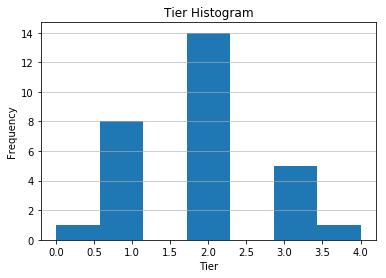

The average tier:  1.896551724137931


In [446]:
plt.hist(x=df_filtered['tier'], bins = 'auto')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tier')
plt.ylabel('Frequency')
plt.title('Tier Histogram')
plt.show()
print('The average tier: ',df_filtered['tier'].mean())

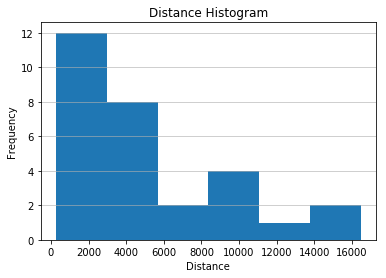

The average distance from center:  5021.620689655172


In [447]:
plt.hist(x=df_filtered['distance'], bins = 'auto')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Histogram')
plt.show()
print('The average distance from center: ',df_filtered['distance'].mean())

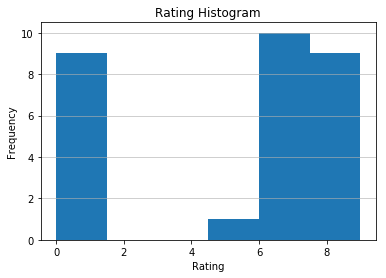

The average rating:  5.0


In [448]:
plt.hist(x=df_filtered['rating'], bins = 'auto')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Histogram')
plt.show()
print('The average rating: ',df_filtered['rating'].mean())

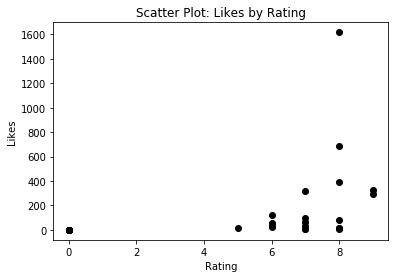

In [449]:
plt.plot(df_filtered['rating'], df_filtered['likes'], 'o', color='black');
plt.xlabel('Rating')
plt.ylabel('Likes')
plt.title('Scatter Plot: Likes by Rating')
plt.show()


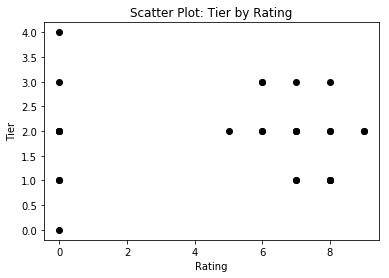

In [450]:
plt.plot(df_filtered['rating'], df_filtered['tier'], 'o', color='black');
plt.xlabel('Rating')
plt.ylabel('Tier')
plt.title('Scatter Plot: Tier by Rating')
plt.show()


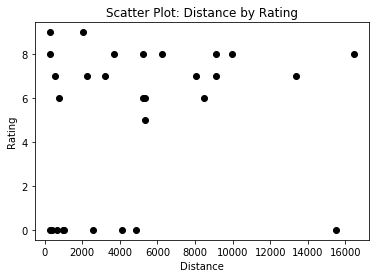

In [459]:
plt.plot(df_filtered['distance'], df_filtered['rating'], 'o', color='black');
plt.xlabel('Distance')
plt.ylabel('Rating')
plt.title('Scatter Plot: Distance by Rating')
plt.show()

In [454]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the New York City
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New York City',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
venues_map
